In [31]:
import pandas as pd
import string

from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
#from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
#from sklearn.utils.multiclass import unique_labels

#Normalizar
import numpy as np
from sklearn import preprocessing

#Para convertir el dataset de atributos categoricos a numericos
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#PCA
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt


#################STAGE 1: DATASET SELECTION -> Chess End-Game -- King+Rook versus King+Pawn on a7
# load dataset 
dataset =pd.read_csv("chess.txt", header=None)

#Attribute 36 -> targets
#print dataset.shape
#print dataset
#print dataset

###############STAGE 2: PRE-PROCESSING //// NO MISSING VALUES
from numpy import array

n_filas=dataset.shape[0]
data_chess = [[0 for x in range(dataset.shape[1] - 1)] for y in range(dataset.shape[0])]
targets_chess = [0 for x in range(dataset.shape[0])]

for i in range(0, dataset.shape[0]):
    for j in range(0, dataset.shape[1]- 1):
        data_chess[i][j] = dataset.at[i,j]

for i in range(0, dataset.shape[0]):
    if(dataset.at[i,36] == "won"):
        targets_chess[i] = 0
    else:
        targets_chess[i]=1
        
    #targets_chess[i] = dataset.at[i, 36]
    
#DATASET REINDEX================================
division_a = [0 for x in range(n_filas)]
for i in range(0, n_filas):
    division_a[i]=i
#print division_a
divison_a = np.random.shuffle(division_a)
#print division_a

dataset = pd.DataFrame(dataset)
dataset = dataset.reindex(index=division_a)
print dataset
#END DATASET REINDEX===============================




label_encoder = LabelEncoder()

data_chess_label_encoder = [[0 for x in range(dataset.shape[1] - 1)] for y in range(dataset.shape[0])]
#conversion de categorico a numerico con label encoder
for i in range(0, dataset.shape[0]):
    data_chess_label_encoder[i] = label_encoder.fit_transform(data_chess[i])

#Aplicar one hot encoder a la transformacion de label encoder para finalizar transformacion categorica a numerica
enc = OneHotEncoder(sparse=False)
chess_oneHotEncoder = enc.fit_transform(data_chess_label_encoder)
chess_oneHotEncoder = pd.DataFrame(chess_oneHotEncoder)




     0  1  2  3  4  5  6  7  8  9   ...   27 28 29 30 31 32 33 34 35     36
1792  f  f  f  f  f  t  f  f  f  f  ...    f  f  f  t  f  f  f  f  n    won
2334  f  f  f  f  t  t  t  f  f  f  ...    f  f  f  f  f  f  f  t  t    won
2540  t  f  t  f  f  f  t  t  t  t  ...    f  f  f  f  f  t  f  f  n  nowin
1383  f  f  f  f  f  f  f  f  f  t  ...    f  f  f  f  f  f  t  t  n  nowin
1627  t  f  f  t  f  t  f  f  f  f  ...    f  f  f  f  f  f  f  t  n    won
2580  f  t  f  f  f  t  f  f  f  t  ...    f  f  f  f  f  f  f  t  n  nowin
627   f  f  t  f  f  t  f  f  f  f  ...    f  f  f  f  f  f  f  t  t    won
1905  t  f  f  f  f  t  t  f  f  f  ...    f  f  f  t  f  f  t  f  n    won
76    f  f  f  f  t  f  f  f  f  f  ...    f  f  f  f  f  f  f  t  n    won
2731  f  f  f  f  t  t  t  t  t  t  ...    f  f  f  f  f  f  t  t  t  nowin
1899  f  f  f  f  f  f  f  f  t  f  ...    f  f  f  t  f  f  t  t  n    won
3089  f  f  f  f  f  f  t  f  t  f  ...    f  f  t  f  f  t  f  t  t  nowin
2593  f  f  

In [11]:

#PCA
from sklearn.decomposition import PCA
#Reduccion de dimensiones con PCA
pca = PCA(n_components=2)
#fit and transform the data to the model
reduce_data_pca = pca.fit_transform(chess_oneHotEncoder)


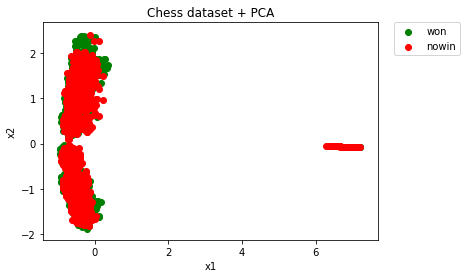

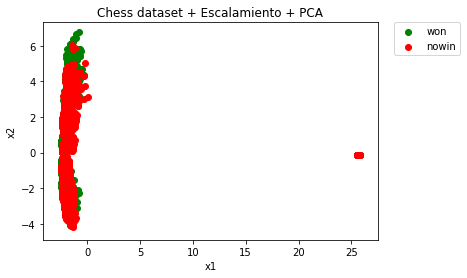

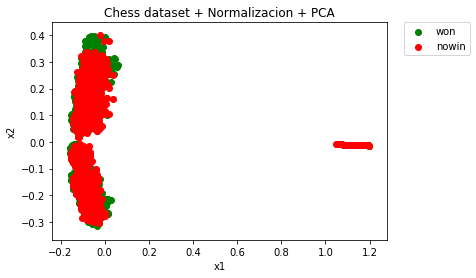

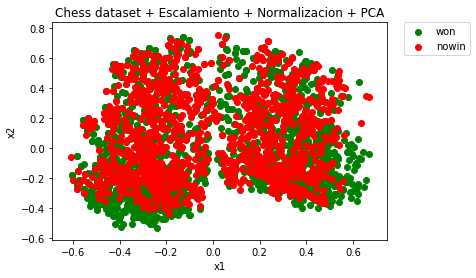

In [13]:
#Grafica
def graficar(dataset, targets, title):
    colors=['green','red']
    targets_name = ["won","nowin"]
    for i in range(len(colors)):
        x = dataset[:,0][targets==i]
        y= dataset[:,1][targets==i]
        plt.scatter(x,y,c=colors[i])
        plt.legend(targets_name,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title(title)
    plt.show()
    
%matplotlib inline
from numpy import asarray
#Graficar visualizacion de datos
targets_chess = asarray(targets_chess)

#########################Grafica PCA solamente
graficar(reduce_data_pca, targets_chess, "Chess dataset + PCA")

########################APLICACION DE ESCALAMIENTO : GRAFICA ESCALAMIENTO + PCA
Matrix_scaled = preprocessing.scale(chess_oneHotEncoder)
pca = PCA(n_components=2)
#PCA
reduce_data_pca_e = pca.fit_transform(Matrix_scaled)
graficar(reduce_data_pca_e, targets_chess,  "Chess dataset + Escalamiento + PCA")

########################APLICACION DE NORMALIZACION: GRAFICA Normalizacion + PCA
Matrix_np = np.asanyarray(chess_oneHotEncoder)
Matrix_normalizada = preprocessing.normalize(Matrix_np, norm='l2')
#PCA
pca = PCA(n_components=2)
reduce_data_pca_n = pca.fit_transform(Matrix_normalizada)
graficar(reduce_data_pca_n, targets_chess,  "Chess dataset + Normalizacion + PCA")

########################APLICACION DE ESCALAMIENTO Y NORMALIZACION: GRAFICA Escalamiento + Normalizacion + PCA
Matrix_np_2 = np.asanyarray(Matrix_scaled)
Matrix_normalizada_2 = preprocessing.normalize(Matrix_np_2, norm='l2')
#PCA
pca = PCA(n_components=2)
reduce_data_pca_e_n = pca.fit_transform(Matrix_normalizada_2)
graficar(reduce_data_pca_e_n, targets_chess,  "Chess dataset + Escalamiento + Normalizacion + PCA")

In [18]:
#NaiveBayes

class Bayes(BaseEstimator):
    dataset = [] #dataset
    targets = [] #array contenedor de las etiquetas de cada registro del dataset
    targets_name = [] #array contenedor de todas las posibles etiquetas
    new_tuple = [] #nuevo registro: Contenedor de F1..Fn (atributos)
    aProbF = [] #array contenedor de probabilidades de Fs (columnas del dataset)
    #aProbC = [] #array contenedor de probabilidades de C (todas las posibles etiquetas)
    #aProbC_new_tuple = [] #array contenecdor de probabilidades de C (respecto al nuevo registro)
    probPositiveLabel = -1
    probPositiveLabelStart = -1
    ind_positiveLabel = 0
    
    #Constructor recibe como parametros:
    def __init__(self, targets_name):
        self.targets_name = targets_name
    
    def fit(self, X, y):
        self.dataset = self.verifyType(X)
        self.targets = y
        self.initArrays()
        cont=0.0
        for i in range(0, len(self.targets)):
            if(self.targets_name[i]== self.targets[self.ind_positiveLabel]):
                cont = cont + 1.0
        self.probPositiveLabelStart = cont / len(self.targets)
        """"for i in range(0, len(self.targets_name)):
            cont = 0.0
            for j in range(0, len(self.targets)):
                if(self.targets_name[i] == self.targets[j]):
                    cont = cont + 1.0
            self.aProbC[i] = cont / len(self.targets)"""
        return self
    
    def predict(self, X):
        y = [-1 for d in range( len(X) )]
        for i in range(0, len(X) ):
            y[i] = self.perform(X[i])
        return y
    def predict_proba(self, X):
        y = [-1 for d in range( len(X) )]
        for i in range(0, len(X) ):
            y[i] = self.perform(X[i])
        return y
        #return #probabilidades de que la i-esima
        #fila de X le quede la etiqueta positiva
        
    
    #funcion que verifica si el dataset recibido como parametro es de tipo DataFrame, si no es asi, se convierte a este tipo
    def verifyType(self, X):
        if(not type(X)==pd.DataFrame):
            X = pd.DataFrame(data=X)
        return X
    #Funcion que inicializa los arrays de probabilidades
    def initArrays(self):
        self.aProbF = [0.0 for x in range(self.dataset.shape[1])]
        #self.aProbC = [0.0 for x in range(len(self.targets_name))]
        #self.aProbC_new_tuple = [0.0 for x in range(len(self.targets_name))]
        
    #Funcion que ejecuta el algoritmo
    def perform(self, new_tuple):
        #for x in range(0, len(self.targets_name)):
        cont = 0.0
        self.aProbF = [0.0 for d in range(self.dataset.shape[1])]
        for i in range(0, self.dataset.shape[0]):
            if(self.targets_name[self.ind_positiveLabel]==self.targets[self.ind_positiveLabel]):
                cont = cont + 1.0
                for j in range(0, self.dataset.shape[1]):
                    if(self.dataset.at[i,j] == new_tuple[j]):
                        self.aProbF[j] = self.aProbF[j] + 1.0
        self.exProbFandC(cont,self.ind_positiveLabel)
        return self.getLabel()
        
        
    #Funcion que calcula las probabilidades de cada etiqueta posible
    def exProbFandC(self, norm, indC):
        acum = 1.0
        for i in range(0, len(self.aProbF)):
            self.aProbF[i] = self.aProbF[i] / norm
            acum = acum * self.aProbF[i]
        #self.aProbC_new_tuple[indC] = self.aProbC[indC] * acum
        self.probPositiveLabel = self.probPositiveLabelStart * acum
    
    #Funcion que retorna la etiqueta con la probabilidad mas alta
    def getLabel(self):
        # aux=0.0
        #ind = -1
        #for i in range(0,len(self.aProbC)):
        #    if(self.aProbC_new_tuple[i] >= aux):
        #        aux=self.aProbC_new_tuple[i]
       #         ind = i
        return self.probPositiveLabel
    
    #Funcion que imprime las probabilidades de todas las etiquetas posibles
    def printProb(self):
        print "*Probabilidades de las etiquetas*"
        for i in range(0,len(self.aProbC)):
            print "C[",self.targets_name[i],"| F]"," = ",self.aProbC[i]

In [19]:
#ROC Curves

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = chess_oneHotEncoder
y = targets_chess
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = Bayes(targets_chess)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyboardInterrupt: 